<a href="https://colab.research.google.com/github/gheaisywr/CHECKPOINT-AVD/blob/main/Checkpoint_3_Ghea_Aisyah_Windraswari_022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Kejadian Tanah Longsor Akibat Curah Hujan Periode 2007–2016**

## **Library**

In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.impute import KNNImputer

## **Dataset**

In [325]:
file = '/content/drive/MyDrive/AVD/catalog.csv'
df = pd.read_csv(file)
df

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Business Understanding**

#### **Studi Kasus**

Selama tahun 2007–2016, banyak kejadian tanah longsor terjadi di berbagai negara akibat curah hujan yang tinggi. Namun, belum diketahui secara jelas wilayah mana yang paling sering mengalami longsor dan kapan waktu yang paling rawan terjadinya bencana tersebut.

Melalui dataset Global Landslide Catalog (GLC), dilakukan analisis untuk melihat pola kejadian longsor berdasarkan lokasi dan waktu, serta memahami hubungan antara curah hujan dan kejadian longsor. Hasil analisis ini diharapkan bisa membantu menentukan wilayah yang perlu diprioritaskan dalam upaya mitigasi dan pengurangan risiko bencana.

#### **Business Objective**

Dataset ini merupakan dataset Global Landslide Catalog (GLC) pada tazun 2007-2016. Dataset ini memiliki 1693 baris dan 23 kolom. Dataset Global Landslide Catalog (GLC) berisi data kejadian tanah longsor di berbagai negara yang dipicu oleh curah hujan. Masalah utamanya adalah tanah longsor sering menyebabkan banyak korban jiwa. Penyebab paling umum biasanya karena hujan deras dalam waktu lama yang membuat tanah jadi jenuh dan akhirnya longsor. Selain itu, masih banyak wilayah yang belum punya sistem mitigasi berbasis data untuk mengurangi risiko bencana ini.

Tujuan dari analisis dataset ini adalah untuk melihat pola kejadian longsor berdasarkan lokasi dan waktu, memahami hubungan antara curah hujan dan seberapa sering longsor terjadi, serta membantu memberikan dasar pertimbangan dalam pengambilan keputusan mitigasi bencana.

Diharapkan hasil analisis ini bisa digunakan oleh pemerintah atau lembaga kebencanaan untuk menentukan wilayah yang harus diprioritaskan dalam mitigasi dan peringatan dini. Dengan begitu, keputusan yang diambil bisa berdasarkan data, bukan hanya perkiraan.

#### **Assess Situation**

Dataset Global Landslide Catalog (GLC) ini berskala global dan sangat luas, yang mencakup berbagai wilayah yang ada didunia. Dataset ini juga memiliki tantangan yang diantaranya adalah data bersumber dari media dan laporan yang berpotensi menyebabkan dataset yang tidak akurat sesuai dengan dunia nyata, saking banyaknya data kejadian longsor, tidak semua kejadian longsor tercatat (under reporting), ada kemungkinan data hilang pada variabel seperti lokasi presisi atau curah hujan, perubahan iklim berskala global, dan masalah utamanya adalah "Kerancuan Data" (Data Ambiguity). Karena rentang waktunya sangat panjang (sejak 2007), kemungkinan besar dataset mengalami fragmentasi format yang membuat analisis menjadi tidak valid. Selain itu, data yang kosong atau format yang berbeda beda bisa mempengaruhi hasil analisis, sehingga perlu diperiksa dan dibersihkan terlebih dahulu agar hasilnya tetap akurat.

#### **Analytic Goals**

Dari permasalahan yang ada pada dataset Global Landslide Catalog (GLC), tujuan analisis yang akan dilakukan diantaranya:

*   Menganalisis pola kejadian tanah longsor berdasarkan lokasi untuk mengetahui wilayah yang paling sering terdampak.
*   Menganalisis pola waktu kejadian untuk melihat apakah tren peningkatan atau musim tertentu yang lebih rawan longsor.
*   Mengidentifikasi hubungan antara curah hujan dan frekuensi kejadian longsor untuk mengetahui seberapa besar pengaruh hujan terhadap terjadinya bencana.

Analisis ini juga bertujuan untuk mengetahui wilayah dengan kejadian longsor paling tinggi selama tahun 2007–2016, menentukan waktu yang paling rawan terjadi longsor, serta melihat seberapa besar pengaruh curah hujan terhadap kejadian tersebut. Dengan tujuan yang lebih jelas, hasil analisis bisa lebih bermanfaat untuk mitigasi bencana.

Hasil analisis ini diharapkan dapat memberikan gambaran wilayah prioritas mitigasi dan membantu dalam pengambilan keputusan terkait pengurangan risiko bencana sedini mungkin.

#### **Project Plan**

Rencana pengolahan dataset Global Landslide Catalog (GLC) adalah sebagai berikut:


1.   Data Understanding, yaitu melihat struktur dataset, mengecek tipe data, dan mencari apakah ada data yang kosong (missing value).
2.   Data Preparation atau Membersihkan data, yaitu memperbaiki data yang kosong, menyamakan format tanggal dan lokasi, serta menghapus data yang duplikat.
3.   Visualization, yaitu membuat visualisasi untuk melihat sebaran lokasi longsor, tren kejadian dari waktu ke waktu, dan hubungan dengan curah hujan.
4.   Feature Engineering, yaitu membuat variabel tambahan seperti bulan atau musim kejadian, serta mengelompokkan intensitas curah hujan.
5.   Modeling (opsional), yaitu membuat model untuk mengklasifikasikan risiko longsor dan mengevaluasi hasil model tersebut.
6.   Dashboard, yaitu membuat visualisasi interaktif untuk menampilkan wilayah rawan longsor dan tren kejadian berdasarkan waktu.
7.   Insight dan Action, yaitu menentukan wilayah yang perlu diprioritaskan dalam mitigasi serta mengidentifikasi musim yang paling rawan longsor.

## **Deskripsi Data**

#### **Struktur Data (Informasi Lanjutan)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

1. id:\
        Jumlah baris: 1693\
        Tipe data: int64\
        Deskripsi: Primary key untuk mengidentifikasikan setiap kejadian.

2. date:\
        Jumlah baris: 1690\
        Tipe data: object\
        Deskripsi: Tanggal terjadinya kejadian longsor.

3. time:\
        Jumlah baris: 629\
        Tipe data: object\
        Deskripsi: Waktu kejadian longsor.

4. continent_code:\
        Jumlah baris: 164\
        Tipe data: object\
        Deskripsi: Kode benua tempat kejadian longsor terjadi.

5. country_name:\
        Jumlah baris: 1693\
        Tipe data: object\
        Deskripsi: Nama negara lokasi kejadian longsor.

6. country_code:\
        Jumlah baris: 1693\
        Tipe data: object\
        Deskripsi: Kode ISO negara.

7. state/province:\
        Jumlah baris: 1692\
        Tipe data: object\
        Deskripsi: Provinsi atau Wilayah.

8. population:\
        Jumlah baris: 1693\
        Tipe data: int64\
        Deskripsi: Perkiraan jumlah populasi yang ada di sekitar lokasi kejadian longsor.

9. city/town:\
        Jumlah baris: 1689\
        Tipe data: Object\
        Deskripsi: Nama kota atau desa tempat kejadian longsor.

10. distance:\
        Jumlah baris: 1692\
        Tipe data: float74\
        Deskripsi: Jarak dari pusat kota.

11. location_description:\
        Jumlah baris: 551\
        Tipe data: object\
        Deskripsi: Deskripsi lokasi kejadian longsor.

12. latitude:\
        Jumlah baris: 1692\
        Tipe data: float64\
        Deskripsi: Koordinat garis lintang lokasi kejadian longsor.

13. longitude:\
        Jumlah baris: 117\
        Tipe data: float64\
        Deskripsi: Koordinat garis bujur lokasi kejadian longsor.

14. geolocation:\
        Jumlah baris: 1692\
        Tipe data: object\
        Deskripsi: Gabungan latitude dan longitude dalam format string.

15. hazard_type:\
        Jumlah baris: 1692\
        Tipe data: object\
        Deskripsi: Jenis bahaya (misal: Landslide)

16. landslide_type:\
        Jumlah baris: 1692\
        Tipe data: object\
        Deskripsi: Tipe longsor (Mudslide, Rockfall, Riverbank collapse).

17. landslide_size:\
        Jumlah baris: 1692\
        Tipe data: object\
        Deskripsi: Ukuran longsor (small, medium, large, dll).

18. trigger:\
        Jumlah baris: 1691\
        Tipe data: object\
        Deskripsi: Faktor pemicu longsor.

19. storm_name:\
        Jumlah baris: 132\
        Tipe data: object\
        Deskripsi: Nama badai jika kejadian longsor terjadi karena badai tertentu.

20. injuries:\
        Jumlah baris: 515\
        Tipe data: float64\
        Deskripsi: Jumlah korban luka.

21. fatalities:\
        Jumlah baris: 1446\
        Tipe data: float64\
        Deskripsi: Jumlah korban meninggal.

22. source_name:\
        Jumlah baris: 872\
        Tipe data: object\
        Deskripsi: Sumber informasi kejadian.

23. source_link:\
        Jumlah baris: 1593\
        Tipe data: object\
        Deskripsi: Tautan referensi sumber.

#### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
count,1693.000000,1690,629,164,1693,1693,1692,1.693000e+03,1689,1692.000000,...,1692,1693,1692,1692,1691,132,515.000000,1446.000000,872,1593
unique,NaN,922,159,1,28,28,226,NaN,1034,NaN,...,1678,1,14,7,16,49,NaN,NaN,552,1325
top,NaN,5/3/10,Night,SA,United States,US,Kentucky,NaN,Santo Domingo,NaN,...,"(43.026600000000002, -76.330200000000005)",Landslide,Landslide,Medium,Downpour,Tropical Storm Tomas,NaN,NaN,CONRED,http://www.thelevisalazer.com/2010/05/03/high-...
freq,NaN,21,97,164,986,986,124,NaN,20,NaN,...,4,1693,866,965,866,14,NaN,NaN,16,11
mean,4145.027761,NaN,NaN,NaN,NaN,NaN,NaN,9.345940e+04,NaN,7.822695,...,NaN,NaN,NaN,NaN,NaN,NaN,0.526214,1.459198,NaN,NaN
std,2236.741960,NaN,NaN,NaN,NaN,NaN,NaN,5.226016e+05,NaN,9.358256,...,NaN,NaN,NaN,NaN,NaN,NaN,3.427514,9.184653,NaN,NaN
min,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000030,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,2330.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.080000e+03,NaN,1.936360,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,4087.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.785000e+03,NaN,4.538635,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
75%,6098.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.886700e+04,NaN,9.873865,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN


1. Count (Kelengkapan Data)
Berdasarkan data, total baris adalah 1693. Maka dapat disimpulkan:
* date hilang 3 data (1693 - 1690)
* time hilang 1064 data (1693 - 629)
* continent code hilang 1529 data (1693 - 164)
* state province hilang 1 data (1693 - 1692)
* city/town hilang 4 data (1693 - 1689)
* distance hilang 1 data (1693 - 1692)
* geolocation hilang 1 data (1693 - 1692)
* landslide type hilang 1 data (1693 - 1692)
* landslide size hilang 1 data (1693 - 1692)
* trigger hilang 2 data (1693 - 1691)
* storm name hilang 1561 data (1693 - 132)
* injuries hilang 1178 data (1693 - 515)
* fatalities hilang 247 data (1693 - 1446)
* source name hilang 821 data (1693 - 872)
* source link hilang 100 data (1693 - 1593)



Kesimpulan: Kolom data, time, continent code, state province, city/town, distance, geolocation, landslide type, landslide size, trigger, storm name, injuries, fatalities, source name, dan source link mengandung missing values, sementara kolom lainnya udah lengkap (1693 data)



---



2. Mean vs Median (Distribusi Data)

* Kolom population
  * Mean = 93.459,40
  * Median = 5.785
  - Nilai rata-rata jauh lebih besar dari median
  menunjukkan adanya jumlah population yang sangat tinggi (outlier), sehingga distribusi data cenderung miring ke kanan (tidak simetris).

* Kolom distance
  * Mean = 7,82
  * Median = 4,54
  - Rata-rata distance sedikit lebih besar dari median. Ini menunjukkan adanya beberapa nilai jarak yang cukup besar (outlier) sehingga menarik nilai rata-rata ke atas dan membuat distribusi data cenderung miring ke kanan.

* Kolom injuries
  * Mean = 0,53
  * Median = 0
  - Perbedaan yang cukup besar antara mean dan median menunjukkan bahwa sebagian besar kejadian tidak menimbulkan korban luka, tetapi ada beberapa kejadian dengan jumlah korban luka yang tinggi sehingga menaikkan nilai rata-rata.

* Kolom fatalities
  * Mean = 1,46
  * Median = 0
  - Perbedaan antara mean dan median menunjukkan bahwa sebagian besar kejadian tidak menimbulkan korban meninggal, namun ada beberapa kejadian dengan jumlah korban yang besar sehingga membuat nilai rata-rata menjadi lebih tinggi.

Kesimpulan: Secara keseluruhan, data bersifat right-skewed (condong ke kanan),karena memiliki nilai rata-rata yang lebih besar dari median di semua variabel utama.



---



3. Min dan Max (Validasi Logika)

* population
  * Min = 0
  * Max = 1.229.419

* distance
  * Min = 0.00003
  * Max = 74,46

* injuries
  * Min = 0
  * Max = 45

* fatalities
  * Min = 0
  * Max = 280

Kesimpulan:
* Nilai population minimum 0 dan maksimum yang sangat besar menunjukkan perbedaan lokasi kejadian, dari wilayah yang tidak berpenduduk hingga daerah dengan populasi sangat padat.

* Nilai distance yang cukup jauh (hingga 74 km) menunjukkan bahwa beberapa kejadian terjadi cukup jauh dari pusat kota, namun masih dalam batas yang masuk akal.

* Nilai injuries dan fatalities minimum 0 menunjukkan banyak kejadian tidak menimbulkan korban, tetapi adanya nilai maksimum yang cukup tinggi menandakan beberapa kejadian memiliki dampak yang sangat besar.

* Rentang nilai pada setiap kolom masih masuk akal dan sesuai dengan kondisi kejadian bencana.


---



4. Standar Deviasi (std) - Variabilitas Data

* population
  * Mean = 93.459,40
  * Std = 522.601,58

* distance
  * Mean = 7,82
  * Std = 9,36

* injuries
  * Mean = 0,53
  * Std = 3,43

* fatalities
  * Mean = 1,46
  * Std = 9,20

Kesimpulan:
* Population memiliki standar deviasi sangat besar (sekitar 5,59 atau 559% dari rata-rata). Artinya, jumlah penduduk tiap lokasi sangat berbeda-beda dan ada beberapa lokasi yang populasinya sangat tinggi.

* Distance memiliki standar deviasi (sekitar 1,20 atau 120% dari rata-rata). Ini berarti jarak kejadian cukup beragam.

* Injuries dan fatalities memiliki standar deviasi jauh lebih besar dari rata-ratanya (lebih dari 600%, yaitu injuries sekitar 6,47 atau 647% dan fatalities sekitar 6,30 atau 630%). Artinya, sebagian besar kejadian tidak menimbulkan banyak korban, tetapi ada beberapa kejadian dengan korban yang sangat banyak.

## **VERIFIKASI KUALITAS DATA**

#### **Data Type Check**

Kita akan mengecek tipe data dari setiap kolom apakah sudah sesuai atau tidak. Agar insight serta visualisasi yang akan kita buat menjadi akurat.

Dan dapat dilihat dibawah ini, kolom date dengan tipe data object, seharusnya kolom ini bertipe data kan datetime bukan object karena berisi data kejadian. Selain itu, semua kolom sudah sesuai. fatalities, injuries, dan distance sudah bertipe numerik, jadi bisa langsung dihitung. Latitude dan longitude sudah bertipe float dan sesuai untuk visualisasi peta. Kolom seperti country_name, landslide_type, landslide_size, dan trigger sudah sesuai sebagai data object.

In [ ]:
df.dtypes

,0
id,int64
date,object
time,object
continent_code,object
country_name,object
country_code,object
state/province,object
population,int64
city/town,object
distance,float64


#### **Inconsistent Values**

1. **Time**

Pada kolom ini, dapat terlihat format tanggal tidak konsisten dengan format yang sama. Semua memiliki format yang berbeda-beda. Maka hal ini perlu ditangani dengan cara kita akan menyamakan format nya menjadi yyy-mm-dd.

In [ ]:
print(df['time'].unique())

['Night' nan '19:30:00' 'Early morning' '1:41:00' 'Afternoon' '11:30:00'
 'Morning' '23:25:00' '18:00:00' '22:00:00' '17:36:00' 'Overnight'
 '16:30:00' '13:40:00' '15:00:00' '7:00:00' '19:00:00' '22:00' '0:00:00'
 '12:00' '6:45:00' '18:15:00' '2:00:00' 'Late morning' '23:30:00'
 '11:00:00' '7:19:00' 'Evening' '21:00:00' '5:00:00' '10:00:00' '17:00:00'
 '1:30:00' '12:00:00' '5:30:00' '6:00:00' 'Late evening' '8:00:00'
 '14:30:00' '15:45:00' '9:30:00' '18:46:00' '2:30:00' '15:30:00'
 '13:45:00' '15:40:00' '14:10:00' '4:30:00' '18:53:00' '11:45:00'
 'Late night' '23:00:00' '13:00:00' '3:00:00' '4:00:00' '20:00:00' '13:00'
 '0:15:00' '0:30:00' '10:30:00' 'Before dawn' '9:00:00' '7:30:00'
 '14:00:00' '1:00:00' '12:30:00' '21:30:00' '12:15' '1:52:00'
 'Late afternoon' '9:50:00' '5:45:00' '3:30:00' '21:40:00' '20:40:00'
 '15:00' '17:45:00' ' ' '11:50:00' '15:32' '9:40:00' '1:13' '3:20:00'
 '20:45:00' '15:15:00' '13:30:00' '15:25:00' '16:00:00' '19:45:00'
 '4:55:00' '6:15:00' '17:15:00' '16:58

2. **Landslide Size**

Pada kolom landslide_size ditemukan beberapa penulisan kategori yang tidak konsisten.

Contoh yang muncul di data:

1. Small dan small
2. Medium dan medium
3. Very Large, very_large, dan very large

Nilai-nilai tersebut sebenarnya memiliki arti yang sama, tapi karena penulisannya berbeda (huruf besar-kecil atau spasi dan underscore), sistem akan menganggapnya sebagai kategori yang berbeda. Jika tidak diperbaiki, hasil visualisasi bisa menjadi tidak akurat.

Karena itu, semua nilai pada kolom ini perlu diseragamkan, misalnya menggunakan huruf kecil dan satu format yang sama.

In [ ]:
print(df['landslide_size'].unique())

['Small' 'Large' 'Medium' 'Very_large' 'medium' 'large' 'small' nan]


3. **Landslide Type**

Dapat dilihat, terdapat banyak sekali ketidakkonsistenan data pada pada kolom landslide_type.

Nilai pada kolom landslide_type sebenarnya memiliki arti yang sama, tetapi karena penulisannya berbeda (misalnya huruf besar-kecil seperti Mudslide dan mudslide atau penggunaan spasi dan underscore seperti rock fall dan rock_fall), sistem akan menganggapnya sebagai kategori yang berbeda.

Jika tidak diperbaiki, jumlah landslide_type bisa terlihat lebih banyak dari yang sebenarnya dan hasil visualisasi menjadi tidak akurat.

Karena itu, semua nilai pada kolom ini perlu diseragamkan, misalnya menggunakan huruf kecil dan satu format penulisan yang sama.

In [ ]:
print(df['landslide_type'].unique())

['Landslide' 'Riverbank collapse' 'Mudslide' 'Complex' 'Debris flow'
 'Rockfall' 'Lahar' 'Creep' 'Snow avalanche' 'mudslide' 'Other' 'Unknown'
 'Rockslide' 'landslide' nan]


4. **Trigger**

Pada kolom trigger terdapat penulisan yang tidak konsisten. Beberapa nilai memiliki arti yang sama, tetapi ditulis berbeda, misalnya Rain dan rain, atau heavy rain dan heavy_rain.

Karena perbedaan ini, sistem bisa menganggapnya sebagai kategori yang berbeda.

Jika tidak diperbaiki, jumlah penyebab longsor bisa terlihat lebih banyak dari yang sebenarnya dan hasil visualisasi menjadi kurang akurat.

Oleh karena itu, semua nilai pada kolom ini perlu diseragamkan dengan satu format yang sama.

In [ ]:
print(df['trigger'].unique())

['Rain' 'Downpour' 'Unknown' 'Tropical cyclone' 'Continuous rain'
 'Flooding' 'Dam embankment collapse' 'Earthquake' 'Construction'
 'Freeze thaw' 'Mining digging' 'Other' 'unknown' 'Snowfall snowmelt' nan
 'downpour' 'Volcano']


#### **Missing Values**

Pada tahap ini, kita akan melihat seberapa banyak data yang hilang pada seluruh kolom. Dan terlihat bahwa kolom:
* time

Memiliki missing values sekitar 63%, yang dimana ini cukup besar indikasi hilang nya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.

* continent_code

Memiliki missing values sekitar 90% yang dimana ini sangat besar indikasi hilang nya data pada kolom tersebut. Sehingga perlu ditangani atau dihapus.


* location_description

Memiliki missing values sekitar 67% yang dimana hal ini perlu ditangani dengan cara mau ditangani atau dihapus.


* storm_name

Memiliki missing values sekitar 92% yang dimana ini sangat besar indikasi hilang nya data pada kolom tersebut. Tidak semua longsor disebabkan oleh badai, jadi wajar banyak kosong. Jadi tidak masalah jika kosong, karena memang tidak selalu ada badai. Bisa dibiarkan kosong tapi lebih baik diisi "unknown".


* injuries

Ada missing values sekitar 69%. Harus hati-hati karena kosong belum tentu berarti 0 korban. Jika memang tidak ada korban maka di isi 0. Jika tidak jelas lebih aman dibiarkan NaN saat analisis tertentu.


* fatalities

Sama seperti injuries, terdapat missing values tapi sekitar 14% dan bisa memengaruhi rata-rata dan standar deviasi. Maka bisa di isi 0 jika benar-benar tidak ada korban.


* source_name & source_link

Kolom ini memiliki missing values sekitar 48% pada source_name dan sekitar 6% source_link. Tapi kekosongan ini tidak memengaruhi analisis statistik, Karena hanya sebagai dokumentasi saja. Bisa dibiarkan kosong atau diabaikan jika tidak digunakan.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
id,0.000000
date,0.177200
time,62.847017
continent_code,90.313054
country_name,0.000000
country_code,0.000000
state/province,0.059067
population,0.000000
city/town,0.236267
distance,0.059067


#### **Duplicated Values**

Pada tahap ini, kita akan mengecek duplikasi pada dataset. Hal ini dilakukan agar dataset memiliki insight dan hasil yang bersih.

In [ ]:
df[df.duplicated()]

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link


Terlihat pada dataset ini tidak ada duplikasi. Maka hal ini tidak perlu ditangani, namun jika ingin menangani anda dapat mengetikkan

df = df.drop_duplicates()

#### **Outliers Values**

Pada tahap ini, kita akan melihat nilai ekstrem (outliers) pada kolom yang bertipe data kan numerik. Hal ini dilakukan agar mendapatkan insight yang akurat sehingga dapat memperkuat analisis dan model yang akan kita bangun nantinya.

Akan tetapi memang tidak semua kolom perlu kita tangani, kita harus tetap melihat dan memahami tujuan dari setiap kolom yang ada di dataset.

Dan terlihat kolom
* Population

Dengan presentase 17%
* distance

Dengan presentase 8%

* latitude

Dengan presentase 0% (dibawah 1%)

* longitude

Dengan presentase 6%

* injuries

Dengan presentase 2%

* fatalities

Dengan presentase 15%

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
id,0.000000
population,17.188423
distance,8.210278
latitude,0.000000
longitude,6.379209
injuries,2.598937
fatalities,15.416421


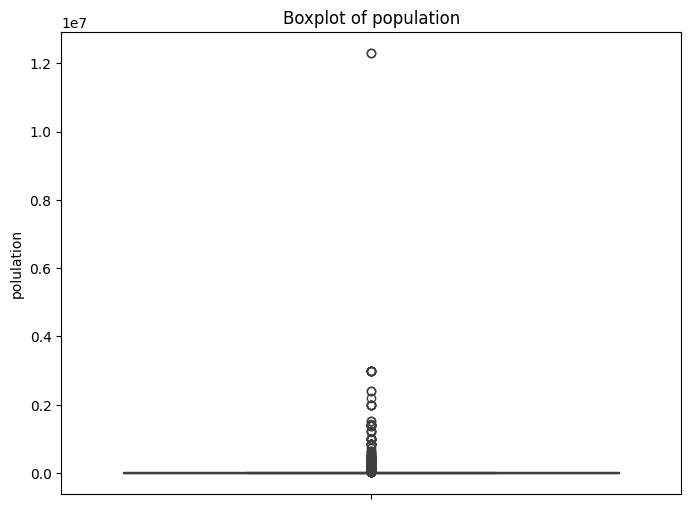

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['population'])
plt.title('Boxplot of population')
plt.ylabel('polulation')
plt.show()

Boxplot menunjukkan penyebaran data population.

Garis di dalam kotak adalah nilai tengah (median).
Kotak menunjukkan sebagian besar data berada di rentang tersebut.
Titik di luar kotak menunjukkan nilai yang sangat tinggi atau sangat rendah (outlier).

Jika ada banyak titik di luar kotak, berarti terdapat beberapa nilai population yang berbeda jauh dari data lainnya.

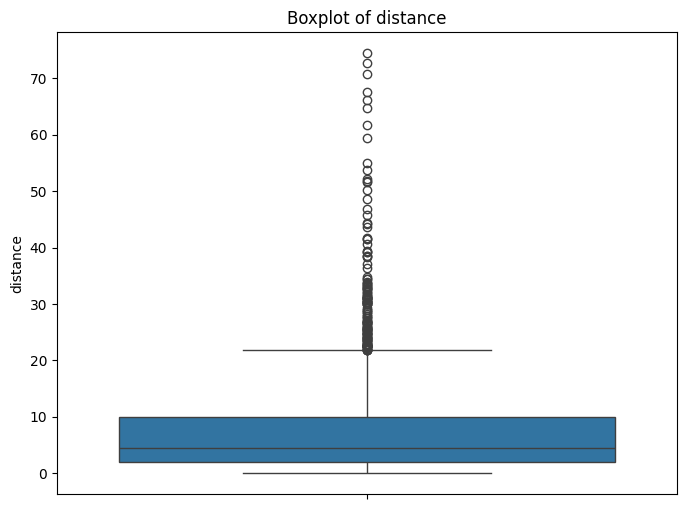

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['distance'])
plt.title('Boxplot of distance')
plt.ylabel('distance')
plt.show()

Boxplot menunjukkan penyebaran data distance.

Garis di dalam kotak adalah nilai tengah (median).
Kotak menunjukkan sebagian besar data berada dalam rentang tersebut.
Titik di luar kotak menunjukkan nilai yang sangat jauh atau tidak biasa (outlier).

Jika terdapat banyak titik di luar kotak, berarti ada beberapa nilai distance yang jauh berbeda dari mayoritas data.

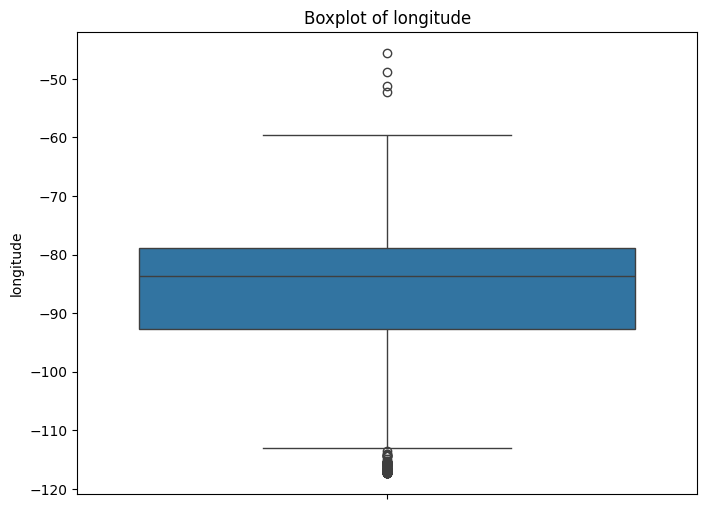

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['longitude'])
plt.title('Boxplot of longitude')
plt.ylabel('longitude')
plt.show()

Boxplot menunjukkan penyebaran data longitude.

Garis di dalam kotak adalah nilai tengah (median).
Kotak menunjukkan rentang sebagian besar data.
Titik di luar kotak menunjukkan nilai yang sangat tinggi atau sangat rendah (outlier).

Jika ada beberapa titik di luar kotak, berarti terdapat nilai longitude yang berbeda jauh dari data lainnya.

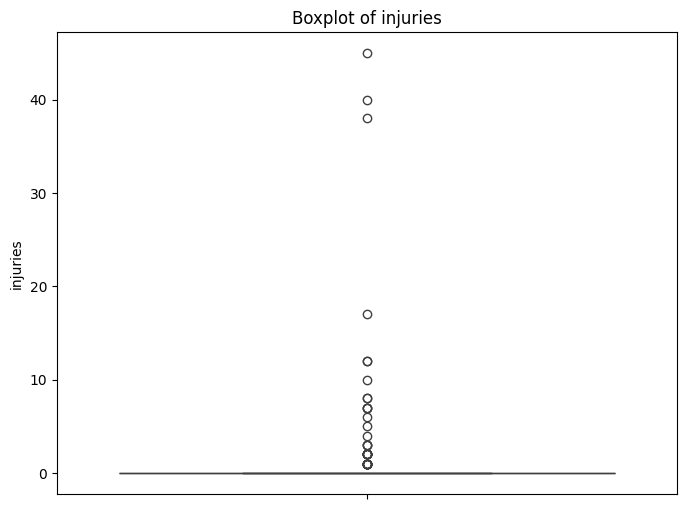

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['injuries'])
plt.title('Boxplot of injuries')
plt.ylabel('injuries')
plt.show()

Boxplot menunjukkan penyebaran data injuries.

Garis di dalam kotak adalah nilai tengah (median).
Kotak menunjukkan sebagian besar data berada pada rentang tersebut.
Titik di luar kotak menunjukkan nilai yang sangat tinggi atau rendah (outlier).

Jika terdapat banyak titik di luar kotak, berarti ada beberapa kejadian dengan jumlah injuries yang jauh berbeda dari mayoritas data.

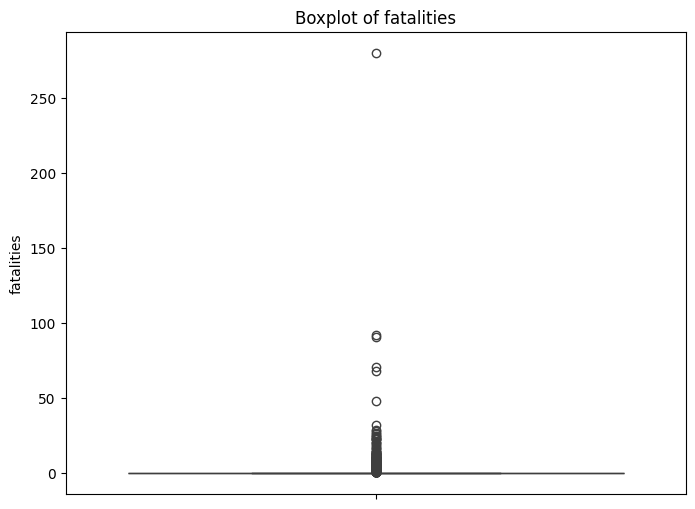

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['fatalities'])
plt.title('Boxplot of fatalities')
plt.ylabel('fatalities')
plt.show()

Boxplot menunjukkan penyebaran data fatalities.

Garis di dalam kotak adalah nilai tengah (median).
Kotak menunjukkan rentang sebagian besar data.
Titik di luar kotak menunjukkan nilai yang sangat tinggi atau rendah (outlier).

Jika ada beberapa titik di luar kotak, berarti terdapat kejadian dengan jumlah fatalities yang jauh lebih besar atau lebih kecil dibandingkan data lainnya.

## **Eksplorasi Data (EDA)**

#### **Comparison/Perbandingan**

1. Aktivitas:
Mengelompokkan dan membandingkan total fatalities berdasarkan country_name, lalu menampilkan 10 negara dengan jumlah fatalities tertinggi.

Tujuan:
Untuk mengetahui negara mana yang memiliki total fatalities paling tinggi serta membandingkan tingkat fatalities antar negara secara langsung.

Visualisasi:
Bar Chart (Grafik Batang) digunakan untuk menampilkan 10 negara dengan total fatalities tertinggi agar perbandingan antar negara terlihat jelas dan mudah dianalisis.

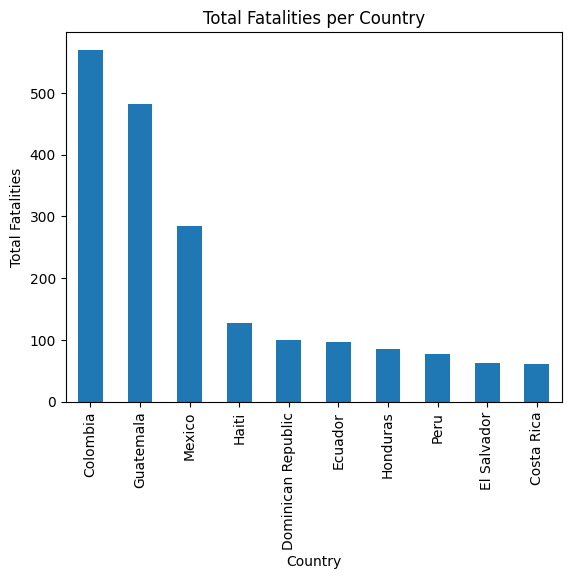

In [ ]:
top_country = df.groupby("country_name")["fatalities"].sum().sort_values(ascending=False).head(10)

top_country.plot(kind="bar")
plt.title("Total Fatalities per Country")
plt.ylabel("Total Fatalities")
plt.xlabel("Country")
plt.show()

Output visualisasi total fatalities per country menunjukkan bahwa Colombia, Guatemala, dan Mexico merupakan negara dengan jumlah korban meninggal akibat landslide tertinggi dibandingkan negara lainnya dalam dataset.

Sebaliknya, Costa Rica dan El Salvador memiliki total korban meninggal yang lebih rendah dibandingkan negara lain yang termasuk dalam visualisasi Top 10.

2. Aktivitas:
Mengelompokkan dan menghitung jumlah kejadian longsor (landslide) berdasarkan country_name, lalu menampilkan 10 negara dengan jumlah kejadian terbanyak.

Tujuan:
Untuk mengetahui negara mana yang paling sering mengalami kejadian longsor serta membandingkan frekuensi kejadian antar negara.

Visualisasi:
Bar Chart (Grafik Batang) digunakan untuk menampilkan 10 negara dengan jumlah longsor terbanyak agar perbandingan terlihat jelas.

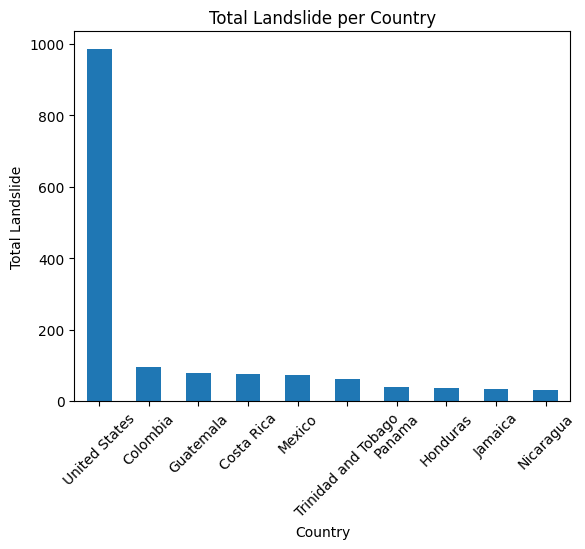

In [ ]:
total_landslide_country = (
    df.groupby("country_name")
      .size()
      .sort_values(ascending=False)
      .head(10)
)

total_landslide_country.plot(kind="bar")
plt.title("Total Landslide per Country")
plt.ylabel("Total Landslide")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi, United States memiliki jumlah kejadian landslide paling tinggi dalam dataset, diikuti oleh Colombia dan Guatemala. Hal ini menunjukkan bahwa ketiga negara tersebut mengalami landslide lebih sering dibandingkan negara lainnya. Sementara itu, negara dengan jumlah kejadian paling rendah dalam Top 10 memiliki frekuensi longsor yang lebih sedikit dibandingkan negara lain di data.

#### **Composition/Komposisi**

Aktivitas: Menghitung dan membandingkan proporsi 5 negara dengan jumlah kejadian landslide tertinggi.

Tujuan: Mengetahui negara dengan jumlah landslide 5 teratas secara keseluruhan.

Visualisasi: Pie Chart (Grafik Lingkaran).

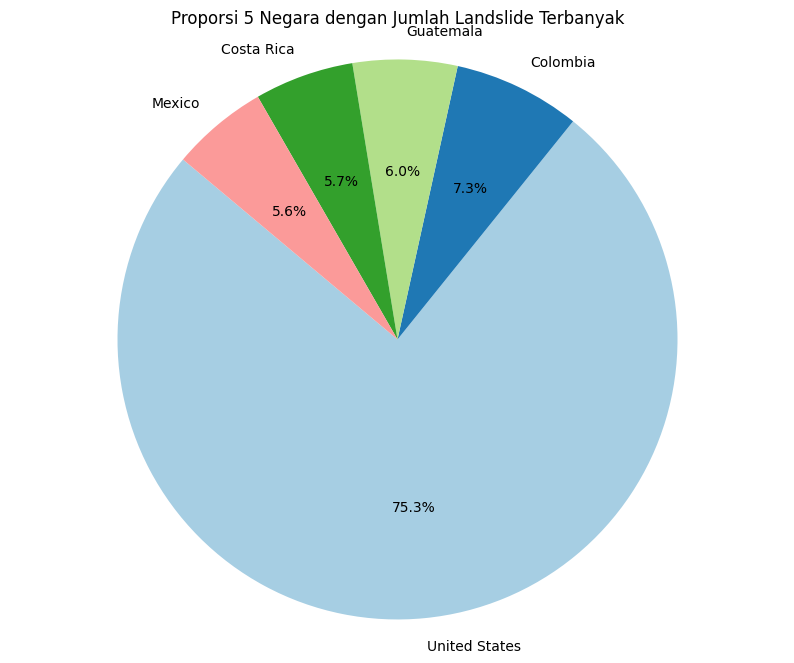

In [ ]:
landslide_by_country = df.groupby('country_name').size().sort_values(ascending=False)
landslide_by_country_top5 = landslide_by_country.head(5)

plt.figure(figsize=(10, 8))
landslide_by_country_top5.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi 5 Negara dengan Jumlah Landslide Terbanyak')
plt.ylabel('')
plt.axis('equal')
plt.show()

Pie chart ini menunjukkan proporsi 5 negara dengan jumlah landslide terbanyak. Negara dengan bagian terbesar memiliki jumlah kejadian paling tinggi dibandingkan negara lainnya dalam Top 5. Sementara itu, negara dengan bagian paling kecil memiliki jumlah kejadian yang lebih sedikit. Grafik ini menunjukkan bahwa kejadian landslide tidak tersebar merata antar negara.

#### **Distribution/Distribusi**

Aktivitas: Menganalisis penyebaran nilai  pada kolom population .

Tujuan: Melihat apakah mayoritas  bernilai kecil atau besar, serta mendeteksi adanya kecondongan (skewness) dalam data

Visualisasi: Histogram.

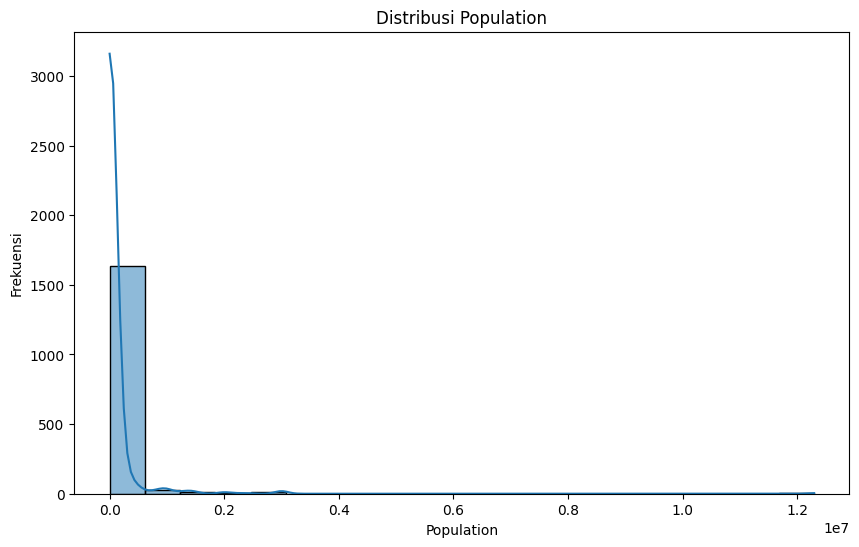

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['population'].dropna(), bins=20, kde=True)
plt.title('Distribusi Population')
plt.xlabel('Population')
plt.ylabel('Frekuensi')
plt.show()

Histogram ini menunjukkan bahwa sebagian besar nilai population berada pada rentang rendah, sedangkan hanya sedikit yang memiliki nilai sangat tinggi. Distribusi terlihat condong ke kanan (positive skewness), yang berarti terdapat beberapa nilai besar yang membuat ekor grafik memanjang ke kanan.

#### **Relationship/Hubungan**

Aktivitas: Menganalisis korelasi antara population dan fatalities.

Tujuan: Mengetahui apakah peningkatan jumlah population berkaitan dengan peningkatan jumlah fatalities.

Visualisasi: Heatmap

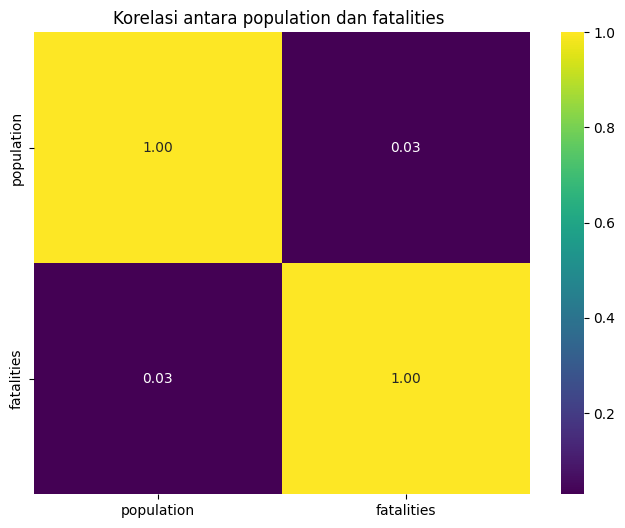

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['population', 'fatalities']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara population dan fatalities ')
plt.show()

Heatmap ini menunjukkan tingkat hubungan antara population dan fatalities melalui nilai korelasi. Jika nilainya mendekati 1, berarti semakin besar population maka fatalities cenderung meningkat. Jika mendekati 0, berarti hubungannya lemah atau hampir tidak ada. Semakin tinggi nilai korelasi, semakin kuat hubungan antara kedua variabel tersebut.

## **Data Preparation**

### **Data Type**

Pada tahap ini, kita akan menangani data dengan tipe data yang tidak sesuai dengan yang seharusnya.

In [ ]:
df.dtypes

,0
id,int64
date,object
time,object
continent_code,object
country_name,object
country_code,object
state/province,object
population,int64
city/town,object
distance,float64


1. Date\
disini kita bisa lihat tipe data dari kolom date itu adalah object, yang dimana seharusnya tipe datanya adalah datetime, jadi kita tangani dengan menggunakan kode berikut:

In [326]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/tmp/ipython-input-545/2370506791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


2. Time\
kasus yang sama dengan kolom date, pada kolom time juga tipe data sebelumnya adalah object, jadi akan kita tangani menjadi datetime dengan kode berikut:

In [327]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')

/tmp/ipython-input-545/146901932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'], errors='coerce')


3. Injuries\
disini injuries sebelumnya bertipe data kan float, yang dimana perhitungan korban akibat longsor itu tidak bisa di hitung dalam bentuk desimal, jadi saya memutuskan untuk menanganinya dengan mengganti tipe data sebelumnya menjadi integer.

In [302]:
df['injuries'] = df['injuries'].astype('Int64')

4. Fatalities\
sama halnya dengan kolom injuries, kita tangani dengan mengubah nya ke tipe data integer

In [303]:
df['fatalities'] = df['fatalities'].astype('Int64')

Dan berikut ini untuk hasilnya, tipe data sudah berhasil di ubah sesuai dengan yang sebenarnya.

In [ ]:
df.dtypes

,0
id,int64
date,datetime64[ns]
time,datetime64[ns]
continent_code,object
country_name,object
country_code,object
state/province,object
population,int64
city/town,object
distance,float64


### **Missing Values**

Di sini kita akan menangani beberapa data yang hilang atau tidak terbaca, pertama-tama kita cek dulu kolom mana saja yang memiliki missing values.

In [322]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
id,0.000000
date,0.177200
time,62.847017
continent_code,90.313054
country_name,0.000000
country_code,0.000000
state/province,0.059067
population,0.000000
city/town,0.236267
distance,0.059067


Berikut ini beberapa kolom yang saya temukan memiliki missing values:

1. Time\
pada kolom time terdapat missing values sekitar 63% atau sekitar 629 dari 1693 data yang hilang. Sehingga dapat kita tangani dengan melakukan imputasi atau drop. Di sini saya memilih untuk mengimputasi nya saja dengan modus. Kenapa modus? karena time melihat dari angka yang paling sering muncul.

In [332]:
df['time'] = df['time'].fillna(df['time'].dropna().mode()[0])

2. Continent_Code\
pada kolom ini terdapat missing values sekitar 90% atau sekitar 164 dari 1693 data yang hilang. Jadi saya memilih untuk drop saja karena tingkatan nya >=70%, banyak yang kosong jadi buat apa kolomnya tetap ada.

In [ ]:
df = df.drop('continent_code', axis=1)

3. Location_Description\
pada kolom ini terdapat sekitar 67% atau sekitar 551 dari 1693 data yang hilang. Jadi saya memilih untuk imputasi tapi karena tipe datanya object maka saya menggunakan string "unknown".

In [ ]:
df['location_description'] = df['location_description'].fillna('Unknown')

4. Storm_Name\
pada kolom storm_name ini terdapat missing values sangat besar sekitar 92% atau sekitar 132 dari 1693 data yang hilang. jadi saya memutuskan untuk drop saja, karena sebenarnya kolom ini juga tidak begitu berpengaruh dalam analisis saya.

In [310]:
df = df.drop('storm_name', axis=1)

5. Injuries\
pada kolom ini terdapat missing values sekitar 69% atau sekitar 515 dari 1693 data yang hilang. Jadi saya tangani dengan mengimputasi nya menggunakan median. Kenapa median? karena datanya numerik dan biasanya distribusinya miring (skewed).

In [311]:
df['injuries'] = df['injuries'].fillna(df['injuries'].dropna().median())

6. Fatalities\
pada kolom ini terdapat missing values sekitar 14% atau sekitar 1446 dari 1693 data yang hilang. jadi saya melakukan imputasi dengan median, karena kolom fatalities ini mengandung data numerik.


In [312]:
df['fatalities'] = df['fatalities'].fillna(df['fatalities'].dropna().median())

7. Source_Name\
pada kolom ini terdapat missing values sekitar 48% atau sekitar 872 dari 1693 data yang hilang. Kita tangani dengan Imputasi string "unknown" untuk mengisi data kosong pada kolom tersebut.

In [313]:
df['source_name'] = df['source_name'].fillna('Unknown')

8. Source_Link\
pada kolom ini terdapat missing values sekitar 6% atau sekitar 1593 dari 1693 data yang hilang.
Kita tangani dengan Imputasi "Not Available" untuk mengisi data kosong pada kolom tersebut.

Dan berikut ini untuk hasilnya, missing values sudah berhasil di tangani.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
id,0.000000
date,0.177200
time,0.000000
country_name,0.000000
country_code,0.000000
state/province,0.059067
population,0.000000
city/town,0.236267
distance,0.059067
location_description,0.000000


### **Duplicated Values**

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated()]

,id,date,time,country_name,country_code,state/province,population,city/town,distance,location_description,...,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,injuries,fatalities,source_name,source_link


Bisa dilihat saat kita cek apakah ada data yang duplicate dengan sum, dan hasilnya adalah 0 data duplicate pada dataset ini.

### **Inconsistent Values**

Pada tahap ini, kita akan menangani ketidakkonsistenan data & tipe data, yang sudah kita temukan pada tahap verifikasi data sebelumnya.

1. Time\
pada kolom ini dapat terlihat format tanggal tidak konsisten dengan format yang sama. Semua memiliki format yang berbeda-beda. Maka hal ini perlu ditangani dengan cara kita akan menyamakan format nya menjadi yyy-mm-dd atau tipe data datetime. Namun, kolom ini sudah kita tangani dengan kode berikut:

In [ ]:
df["time"] = pd.to_datetime(df["time"], format="mixed")
df["time"].head(5)

,time
0,2026-03-01 03:00:00
1,2026-03-01 03:00:00
2,2026-03-01 03:00:00
3,2026-03-01 03:00:00
4,2026-03-01 03:00:00


In [ ]:
print(df['time'].unique())

<DatetimeArray>
['2026-03-01 03:00:00', '2026-03-01 19:30:00', '2026-03-01 01:41:00',
 '2026-03-01 11:30:00', '2026-03-01 23:25:00', '2026-03-01 18:00:00',
 '2026-03-01 22:00:00', '2026-03-01 17:36:00', '2026-03-01 16:30:00',
 '2026-03-01 13:40:00',
 ...
 '2026-03-01 07:40:00', '2026-03-01 10:05:00', '2026-03-01 23:59:00',
 '2026-03-01 12:20:00', '2026-03-01 15:20:00', '2026-03-01 13:50:00',
 '2026-03-01 13:32:00', '2026-03-01 01:11:00', '2026-03-01 09:45:00',
 '2026-03-01 21:06:00']
Length: 107, dtype: datetime64[ns]


2. Landslide_Size\

Pada kolom landslide_size ditemukan beberapa penulisan kategori yang tidak konsisten. Contoh yang muncul di data (Small dan small, Medium dan medium, Very Large, very_large, dan very large) Nilai-nilai tersebut sebenarnya memiliki arti yang sama, tapi karena penulisannya berbeda (huruf besar-kecil atau spasi dan underscore), sistem akan menganggapnya sebagai kategori yang berbeda. Jika tidak diperbaiki, hasil visualisasi bisa menjadi tidak akurat. Karena itu, semua nilai pada kolom ini kita seragamkan dengan munggunakan UPPERCASE.

In [ ]:
df['landslide_size'] = df['landslide_size'].str.upper()
print(df['landslide_size'].unique())

['SMALL' 'LARGE' 'MEDIUM' 'VERY_LARGE' nan]


3. Landslide_Type\
Dapat dilihat, terdapat banyak sekali ketidakkonsistenan data pada pada kolom landslide_type. Nilai pada kolom landslide_type sebenarnya memiliki arti yang sama, tetapi karena penulisannya berbeda (misalnya huruf besar-kecil seperti Mudslide dan mudslide atau penggunaan spasi dan underscore seperti rock fall dan rock_fall), sistem akan menganggapnya sebagai kategori yang berbeda. Karena itu, semua nilai pada kolom ini diseragamkan menjadi UPPERCASE.

In [ ]:
print(df['landslide_type'].unique())

['Landslide' 'Riverbank collapse' 'Mudslide' 'Complex' 'Debris flow'
 'Rockfall' 'Lahar' 'Creep' 'Snow avalanche' 'mudslide' 'Other' 'Unknown'
 'Rockslide' 'landslide' nan]


Sebelum

In [ ]:
df['landslide_type'] = df['landslide_type'].str.upper()
print(df['landslide_type'].unique())

['LANDSLIDE' 'RIVERBANK COLLAPSE' 'MUDSLIDE' 'COMPLEX' 'DEBRIS FLOW'
 'ROCKFALL' 'LAHAR' 'CREEP' 'SNOW AVALANCHE' 'OTHER' 'UNKNOWN' 'ROCKSLIDE'
 nan]


Sesudah

4. Trigger\
Pada kolom trigger terdapat penulisan yang tidak konsisten. Beberapa nilai memiliki arti yang sama, tetapi ditulis berbeda, misalnya Rain dan rain, atau heavy rain dan heavy_rain. Karena perbedaan ini, sistem bisa menganggapnya sebagai kategori yang berbeda. Jika tidak diperbaiki, jumlah penyebab longsor bisa terlihat lebih banyak dari yang sebenarnya dan hasil visualisasi menjadi kurang akurat. Oleh karena itu, semua nilai pada kolom ini diseragamkan dengan satu format yang sama.

In [ ]:
df['trigger'] = df['trigger'].str.upper()
print(df['trigger'].unique())

['RAIN' 'DOWNPOUR' 'UNKNOWN' 'TROPICAL CYCLONE' 'CONTINUOUS RAIN'
 'FLOODING' 'DAM EMBANKMENT COLLAPSE' 'EARTHQUAKE' 'CONSTRUCTION'
 'FREEZE THAW' 'MINING DIGGING' 'OTHER' 'SNOWFALL SNOWMELT' nan 'VOLCANO']


### **Outliers**

Outliers adalah nilai yang jauh berbeda dari nilai lainnya dalam dataset. Nilai Outlier bisa jauh lebih rendah atau lebih tinggi. Outlier bisa terjadi karena berbagai alasan seperti faktor kesalahan maupun kejadian lain yang tidak terduga.

1. Population\
Population dengan presentase 17%

In [ ]:
Q1 = df["population"].quantile(0.25)
Q3 = df["population"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["population"] = df["population"].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'population': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('population', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('population', axis=1)

# Tampilkan dataframe
display(results_df)

population,Persentase Outliers
id,0.000000
population,0.000000
distance,8.210278
latitude,0.000000
longitude,6.379209
injuries,2.598937
fatalities,15.416421


Sesudah di tangani

2. Distance\
distance dengan presentase 8%

In [ ]:
Q1 = df["distance"].quantile(0.25)
Q3 = df["distance"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["distance"] = df["distance"].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'distance': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('distance', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('distance', axis=1)

# Tampilkan dataframe
display(results_df)

distance,Persentase Outliers
id,0.000000
population,0.000000
distance,0.000000
latitude,0.000000
longitude,6.379209
injuries,2.598937
fatalities,15.416421


Sesudah ditangani

3. longitude\
longitude dengan presentase 6%

In [ ]:
Q1 = df["longitude"].quantile(0.25)
Q3 = df["longitude"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["longitude"] = df["longitude"].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'longitude': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('longitude', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('longitude', axis=1)

# Tampilkan dataframe
display(results_df)

longitude,Persentase Outliers
id,0.000000
population,0.000000
distance,0.000000
latitude,0.000000
longitude,0.000000
injuries,2.598937
fatalities,15.416421


Sesudah ditangani

4. Injuries\
injuries dengan presentase 2%

In [ ]:
Q1 = df["injuries"].quantile(0.25)
Q3 = df["injuries"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["injuries"] = df["injuries"].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'injuries': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('injuries', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('injuries', axis=1)

# Tampilkan dataframe
display(results_df)

injuries,Persentase Outliers
id,0.000000
population,0.000000
distance,0.000000
latitude,0.000000
longitude,0.000000
injuries,0.000000
fatalities,15.416421


Sesudah ditangani

5. Fatalities\
fatalities dengan presentase 15%

In [ ]:
Q1 = df["fatalities"].quantile(0.25)
Q3 = df["fatalities"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["fatalities"] = df["fatalities"].clip(lower=lower_bound, upper=upper_bound)

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'fatalities': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('fatalities', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('fatalities', axis=1)

# Tampilkan dataframe
display(results_df)

fatalities,Persentase Outliers
id,0.0
population,0.0
distance,0.0
latitude,0.0
longitude,0.0
injuries,0.0
fatalities,0.0


Sesudah ditangani

### **Construct Data**

Tahap Construct Data adalah proses kreatif dalam analisis data. Di sini, kita tidak lagi hanya membersihkan data, melainkan membuat sesuatu yang baru dari data yang sudah ada untuk memperkaya analisis.

1. Membuat Kolom Baru "Injuries Status"

Kolom ini dibuat untuk mengelompokkan jumlah korban luka ke dalam kategori tertentu (misalnya: No Injury, Minor, Moderate). Tujuannya adalah memperkaya analisis serta mempermudah visualisasi data, sehingga pola tingkat keparahan kejadian dapat terlihat lebih jelas dibandingkan hanya menggunakan angka mentah.

In [329]:
def categorize_injuries(injuries):
    if injuries == 0:
        return 'No Injury'
    elif injuries <= 5:
        return 'Minor'
    elif injuries <= 20:
        return 'Moderate'
    else:
        return 'Severe'

df['Injuries Status'] = df['injuries'].fillna(0).apply(categorize_injuries)

In [330]:
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,Injuries Status
0,34,2007-03-02,NaT,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,No Injury
1,42,2007-03-22,NaT,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,No Injury
2,56,2007-04-06,NaT,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,No Injury
3,59,2007-04-14,NaT,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,No Injury
4,61,2007-04-15,NaT,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,No Injury


### **Data Reduction**

Tahap Data Reduction (Pengurangan Data) bertujuan untuk menyederhanakan dataset Anda tanpa menghilangkan informasi penting. Fokusnya adalah membuang data yang "berisik" (noisy), tidak relevan, atau terlalu detail sehingga proses analisis menjadi lebih cepat dan hasil visualisasinya lebih bersih.

Kita akan menghapus kolom source_link & location_description karena tidak relevan dengan tujuan analisis dan agar hasil visualisasi yang dihasilkan jauh lebih bersih.

1. Source Link\
Yang sebelumnya kolom ini hanya saya imputasi, tapi karena kolom ini kurang relevan dengan proses analisis jadi saya drop.

In [320]:
df = df.drop('source_link', axis=1)

2. Location Description\
Sama halnya dengan kolom source_link, kolom ini kurang relevan dengan proses analisis jadi kita drop.

In [321]:
df = df.drop('location_description', axis=1)

Setelah di drop:

In [333]:
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,Injuries Status
0,34,2007-03-02,2026-03-01 03:00:00,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,No Injury
1,42,2007-03-22,2026-03-01 03:00:00,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,No Injury
2,56,2007-04-06,2026-03-01 03:00:00,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,No Injury
3,59,2007-04-14,2026-03-01 03:00:00,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,No Injury
4,61,2007-04-15,2026-03-01 03:00:00,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,No Injury


**Informasi** terjadi kesalahan saat saya ingin menangani bagian construct data, karena salah running code jadi isi dari kolom injuries dan fatalities yang awalnya ada (numerik) bertipe data float, jadi kosong atau 0 semua/NaN..

## **Menyimpan Dataset**

In [334]:
df.to_csv('[Bersih]', index=False)